In [1]:
import numpy as np
import pandas as pd 
%matplotlib inline

from sklearn import tree
from sklearn import metrics,model_selection,preprocessing
from IPython.display import Image,display
import matplotlib.pyplot as plt,pydotplus

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [8]:
df = pd.read_table('../datasets/wine.data', sep = ',', header = None)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [10]:
df.rename(columns={0: 'Class', 1: 'Alcohol', 2: 'Malic acid', 3: 'Ash', 4: 'Alcalinity of ash', 5: 'Magnesium',
                   6: 'Total phenols', 7: 'Flavanoids', 8: 'Nonflavanoid phenols', 9: 'Proanthocyanins', 10:'Color intensity', 11:'Hue', 12:'OD280/OD315 of diluted wines', 13:'Proline'}, inplace = True)

In [11]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
# df['Malic acid'] = 'Malic acid: ' + df['Malic acid'].astype(str)
# df['Ash'] = 'Ash: ' + df['Ash'].astype(str)
# df['Alcalinity of ash'] = 'Alcalinity of ash: ' + df['Alcalinity of ash'].astype(str)
# df['Magnesium'] = 'Magnesium: ' + df['Magnesium'].astype(str)
# df['Total phenols'] = 'Total phenols: ' + df['Total phenols'].astype(str)
# df['Flavanoids'] = 'Flavanoids: ' + df['Flavanoids'].astype(str)
# df['Nonflavanoid phenols'] = 'Nonflavanoid phenols: ' + df['Nonflavanoid phenols'].astype(str)
# df['Proanthocyanins'] = 'Proanthocyanins: ' + df['Proanthocyanins'].astype(str)
# df['Color intensity'] = 'Color intensity: ' + df['Color intensity'].astype(str)
# df['Hue'] = 'Hue: ' + df['Hue'].astype(str)
# df['OD280/OD315 of diluted wines'] = 'OD280/OD315 of diluted wines: ' + df['OD280/OD315 of diluted wines'].astype(str)
# df['Proline'] = 'Proline: ' + df['Proline'].astype(str)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [14]:
#Check for missing values
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [16]:
# ML algorithms use math so we do not need string variables(animal names)
data = df.copy()

x = data.drop("Class",axis = 1)# input data
y = data.Class.values# target data

In [17]:
x.shape,y.shape

((178, 13), (178,))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of y_train=>',y_train.shape)
print('Shape of y_test=>',y_test.shape)

Shape of X_train=> (106, 13)
Shape of X_test=> (72, 13)
Shape of y_train=> (106,)
Shape of y_test=> (72,)


## Decision Tree Classifier

In [19]:
decision_tree = tree.DecisionTreeClassifier(random_state = 42)
decision_tree.fit(X_train,y_train)
y_pred_tree = decision_tree.predict(X_test)
print("Test Accurary : ",decision_tree.score(X_test,y_test))
print("Train Accurary : ",decision_tree.score(X_train,y_train))

Test Accurary :  0.9444444444444444
Train Accurary :  1.0


In [20]:
y_pred_tree

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 2, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 2, 2, 3, 2, 2, 3, 1, 1,
       1, 3, 1, 1, 2, 3], dtype=int64)

In [21]:
cm_Dtree = confusion_matrix(y_test,y_pred_tree)
cr_Dtree = classification_report(y_test,y_pred_tree)
print("confusion matrix : \n",cm_Dtree)
print("classification report : \n",cr_Dtree)

confusion matrix : 
 [[23  3  0]
 [ 0 27  0]
 [ 1  0 18]]
classification report : 
               precision    recall  f1-score   support

           1       0.96      0.88      0.92        26
           2       0.90      1.00      0.95        27
           3       1.00      0.95      0.97        19

    accuracy                           0.94        72
   macro avg       0.95      0.94      0.95        72
weighted avg       0.95      0.94      0.94        72



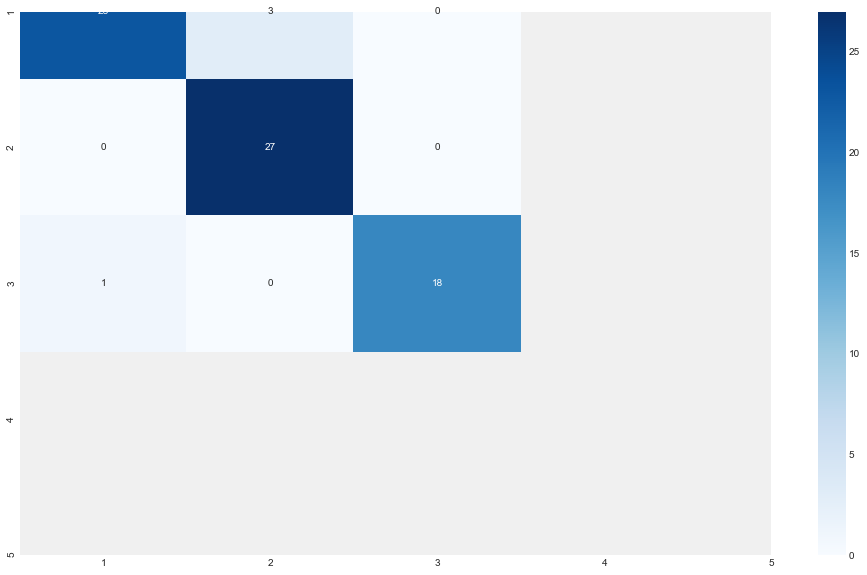

In [26]:
plt.figure(figsize = (15,10))
sns.heatmap(cm_Dtree,annot = True,xticklabels = np.arange(1,6),yticklabels = np.arange(1,6),cmap = "Blues")
plt.show()

In [27]:
#Get column names

col_names = list(x.columns)
col_names

['Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'OD280/OD315 of diluted wines',
 'Proline']

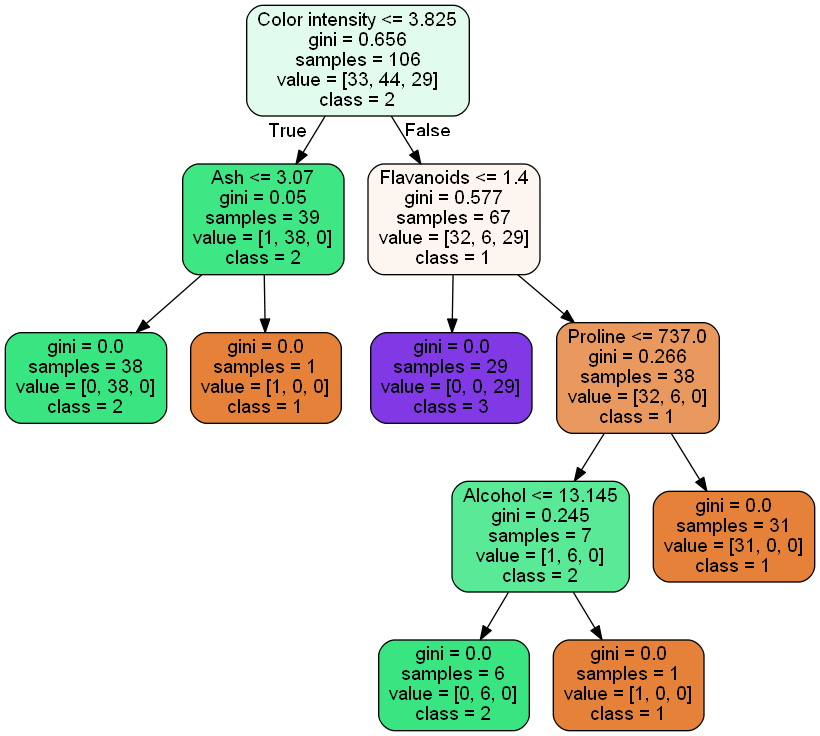

In [28]:
ddata=tree.export_graphviz(decision_tree,out_file=None,filled=True,rounded=True,
                          feature_names=col_names,
                          class_names=["1","2","3"])
graph=pydotplus.graph_from_dot_data(ddata)
display(Image(graph.create_png()))

## Random Forest Model

In [29]:
# Building  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
s_max = 0
rf_train_score_list = []
rf_test_score_list = []

for i in range(1,X_train.shape[0]+1):
    rf = RandomForestClassifier(n_estimators = i,random_state = 42)
    rf.fit(X_train,y_train)
    test_score = rf.score(X_test,y_test)
    rf_test_score_list.append(test_score)
    train_score = rf.score(X_train,y_train)
    rf_train_score_list.append(train_score)
    if test_score >= s_max :
        s_max = test_score
        index = i

print("Best Score = ",s_max)
print("Best n_estimators = ",index)

Best Score =  1.0
Best n_estimators =  106


In [30]:
rf = RandomForestClassifier(n_estimators = 60,random_state = 42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 2, 1, 3, 2, 2, 3, 1, 1,
       1, 3, 1, 1, 2, 3], dtype=int64)

In [31]:
cm_rf = confusion_matrix(y_test,y_pred_rf)
cr_rf = classification_report(y_test,y_pred_rf)
print("confusion matrix : \n",cm_rf)
print("classification report : \n",cr_rf)

confusion matrix : 
 [[26  0  0]
 [ 1 26  0]
 [ 0  0 19]]
classification report : 
               precision    recall  f1-score   support

           1       0.96      1.00      0.98        26
           2       1.00      0.96      0.98        27
           3       1.00      1.00      1.00        19

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



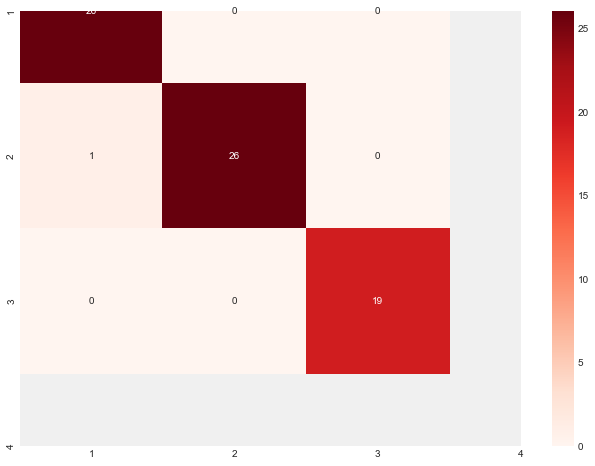

In [32]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_rf,annot = True,xticklabels = np.arange(1,5),yticklabels = np.arange(1,5),cmap = "Reds")
plt.show()

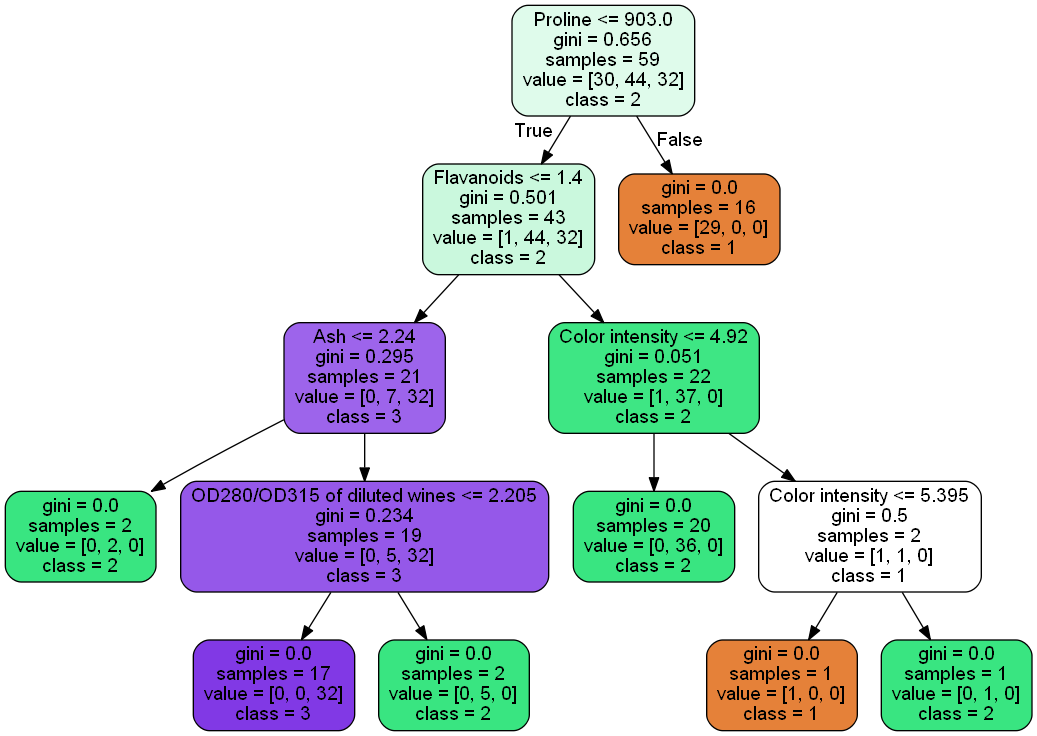

In [33]:
ddata=tree.export_graphviz(rf.estimators_[4],out_file=None,filled=True,rounded=True,
                          feature_names=col_names,
                          class_names=["1","2","3"])
graph=pydotplus.graph_from_dot_data(ddata)
display(Image(graph.create_png()))

## SVM Classification

In [34]:
from sklearn.svm import SVC

svm = SVC(random_state = 42,kernel = "linear")
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
print("Train Accurary : ",svm.score(X_train,y_train))
print("Test Accuray : ",svm.score(X_test,y_test))

Train Accurary :  0.9905660377358491
Test Accuray :  0.9444444444444444


In [35]:
y_pred_svm

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 1,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 1, 1,
       1, 3, 1, 1, 1, 3], dtype=int64)

In [36]:
cm_svm = confusion_matrix(y_test,y_pred_svm)
cr_svm = classification_report(y_test,y_pred_svm)
print("confusion matrix : \n",cm_svm)
print("classification report : \n",cr_svm)

confusion matrix : 
 [[26  0  0]
 [ 4 23  0]
 [ 0  0 19]]
classification report : 
               precision    recall  f1-score   support

           1       0.87      1.00      0.93        26
           2       1.00      0.85      0.92        27
           3       1.00      1.00      1.00        19

    accuracy                           0.94        72
   macro avg       0.96      0.95      0.95        72
weighted avg       0.95      0.94      0.94        72



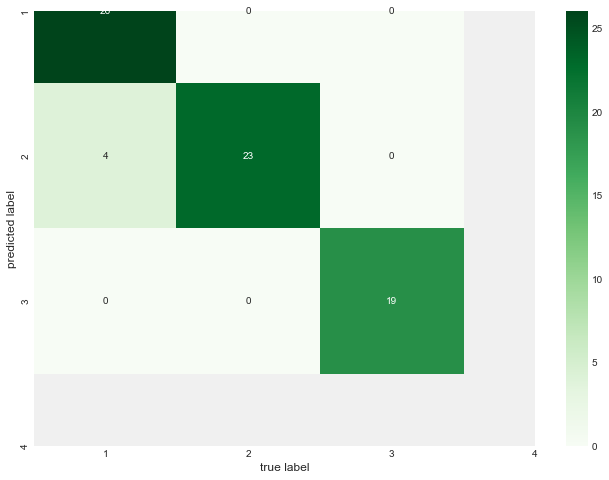

In [37]:
plt.figure(figsize = (10,8))
sns.heatmap(cm_svm,annot = True,cmap = "Greens",xticklabels = np.arange(1,5),yticklabels = np.arange(1,5))
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.show()